In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/KAN_CROP.zip

In [ ]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils

In [ ]:
def crop_and_save_image(img, img_path, write_img_path, img_name):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('/content/drive/MyDrive/data/shape_predictor_68_face_landmarks.dat')
    # load the input image, resize it, and convert it to grayscale

    image = cv2.imread(img_path)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) > 1:
        print( "ERROR: more than one face detected")
        return
    if len(rects) < 1:
        print( "ERROR: no faces detected")
        return

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        name, i, j = 'mouth', 48, 68
        # clone = gray.copy()

        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))        
        roi = gray[y:y+h, x:x+w]
        roi = imutils.resize(roi, width = 250, inter=cv2.INTER_CUBIC)        
        print('cropped/' + write_img_path)
        cv2.imwrite('cropped/' + write_img_path, roi)

In [ ]:
os.listdir('/content/drive/MyDrive/data/dataset/dataset')
predictor = dlib.shape_predictor('/content/drive/MyDrive/data/shape_predictor_68_face_landmarks.dat')

In [ ]:
people = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','M01','M02','M03','M04','M05']
data_types = ['words']
folder_enum = ['01','02','03','04','05']
instances = ['01','02','03','04','05']
words = ['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu']          
words_di = {i:words[i] for i in range(len(words))}

In [ ]:
# if not os.path.exists('cropped'):
#     os.mkdir('cropped')

In [ ]:
# import shutil

# def crop_one_person():      
#     os.mkdir('cropped')
#     people = ['F01']
#     data_types = ['words']
#     folder_enum = ['01']
#     instances = ['01']

#     i = 1
#     for person_ID in people:
#         if not os.path.exists('cropped/' + person_ID ):
#             os.mkdir('cropped/' + person_ID + '/')

#         for data_type in data_types:
#             if not os.path.exists('cropped/' + person_ID + '/' + data_type):
#                 os.mkdir('cropped/' + person_ID + '/' + data_type)
                
#             for phrase_ID in folder_enum:
#                 if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID):
#                     # F01/phrases/01
#                     os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID)

#                 for instance_ID in instances:
#                     # F01/phrases/01/01
#                     directory = '/content/drive/MyDrive/data/dataset/dataset' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
#                     dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
#     #                 print(directory)
#                     filelist = os.listdir(directory)
#                     if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
#                         os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)

#                         for img_name in filelist:
#                             if img_name.startswith('color'):
#                                 image = imageio.imread(directory + '' + img_name)
#                                 crop_and_save_image(image, directory + '' + img_name,
#                                                     dir_temp + '' + img_name, img_name)

#     print(f'Iteration : {i}')
#     i += 1
#     shutil.rmtree('cropped')

In [ ]:
os.listdir('/content/KAN_CROP')

['F07',
 'M03',
 'F03',
 'M05',
 'M02',
 'M04',
 'F10',
 'F05',
 'F08',
 'F04',
 'F02',
 'M01',
 'F09',
 'F01',
 'F06']

In [ ]:

max_seq_length = 42

X_train =[]
y_train =[]
X_val = []
y_val = []
X_test =[]
y_test =[]

MAX_WIDTH =75
MAX_HEIGHT =75


In [ ]:

from skimage.transform import resize
import time

In [ ]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['04']
UNSEEN_TEST_SPLIT = ['05']

directory = "/content/KAN_CROP"


for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                filelist = sorted(os.listdir(path + '/'))
                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('frames'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)                        
                # print(sequence)
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)
                # print(sequence)
                                
                if iteration in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif iteration in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)     
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

Finished reading images for person F01. Time taken : 2.519418954849243 secs.
Finished reading images for person F02. Time taken : 2.1783955097198486 secs.
Finished reading images for person F03. Time taken : 2.2727391719818115 secs.
Finished reading images for person F04. Time taken : 2.2638816833496094 secs.
Finished reading images for person F05. Time taken : 1.8092823028564453 secs.
Finished reading images for person F06. Time taken : 1.4934544563293457 secs.
Finished reading images for person F07. Time taken : 2.3952038288116455 secs.
Finished reading images for person F08. Time taken : 1.3894610404968262 secs.
Finished reading images for person F09. Time taken : 1.720529556274414 secs.
Finished reading images for person F10. Time taken : 2.6503591537475586 secs.
Finished reading images for person M01. Time taken : 3.373011350631714 secs.
Finished reading images for person M02. Time taken : 2.3135581016540527 secs.
Finished reading images for person M03. Time taken : 2.260998725891

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
# print(X_train)
# print(X_val)
# print(X_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(225, 42, 75, 75)
(75, 42, 75, 75)
(75, 42, 75, 75)


In [ ]:

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(225,)
(75,)
(75,)


In [ ]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [ ]:
from keras.utils import np_utils, generic_utils

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train, 5)
y_test = np_utils.to_categorical(y_test, 5)
y_val = np_utils.to_categorical(y_val, 5)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [ ]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(225, 42, 75, 75, 1)
(75, 42, 75, 75, 1)
(75, 42, 75, 75, 1)


In [ ]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop 

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(42, 75, 75, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (2, 2, 2), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
model.add((Flatten()))
# model.add(BatchNormalization())

# # FC layers group
model.add(Dense(2048, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(.4))
# model.add(Dropout(.25))
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dropout(.4))
model.add(Dropout(.25))

model.add(Dense(5, activation='softmax'))
# model.add(Dropout(0.25))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_18 (Conv3D)          (None, 40, 73, 73, 32)    896       
                                                                 
 max_pooling3d_18 (MaxPoolin  (None, 20, 36, 36, 32)   0         
 g3D)                                                            
                                                                 
 conv3d_19 (Conv3D)          (None, 18, 34, 34, 64)    55360     
                                                                 
 max_pooling3d_19 (MaxPoolin  (None, 9, 17, 17, 64)    0         
 g3D)                                                            
                                                                 
 conv3d_20 (Conv3D)          (None, 8, 16, 16, 128)    65664     
                                                                 
 max_pooling3d_20 (MaxPoolin  (None, 4, 8, 8, 128)    

In [ ]:
# # from keras.layers.normalization import BatchNormalization
# #callbacks1 = [callbacks11,callbacks21]
# model = Sequential()

# model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
# model.add(LSTM(128,return_sequences=True,activation='relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# model.add(LSTM(256,activation='relu'))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dropout(0.275))
# model.add(Dense(512))
# #model1.add(Dropout(0.4))
# model.add(Dense(1024))
# model.add(Dense(9,activation='softmax'))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# print(model.summary())

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/60
8/8 [==============================] - 3s 314ms/step - loss: 1.6821 - accuracy: 0.1689 - val_loss: 1.6222 - val_accuracy: 0.2000
Epoch 2/60
8/8 [==============================] - 2s 282ms/step - loss: 1.6321 - accuracy: 0.2000 - val_loss: 1.6134 - val_accuracy: 0.2000
Epoch 3/60
8/8 [==============================] - 2s 283ms/step - loss: 1.6256 - accuracy: 0.1822 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch 4/60
8/8 [==============================] - 2s 283ms/step - loss: 1.6266 - accuracy: 0.1733 - val_loss: 1.6044 - val_accuracy: 0.2000
Epoch 5/60
8/8 [==============================] - 2s 283ms/step - loss: 1.6065 - accuracy: 0.2311 - val_loss: 1.6045 - val_accuracy: 0.2000
Epoch 6/60
8/8 [==============================] - 2s 285ms/step - loss: 1.6095 - accuracy: 0.2311 - val_loss: 1.6040 - val_accuracy: 0.2533
Epoch 7/60
8/8 [==============================] - 2s 284ms/step - loss: 1.5963 - accuracy: 0.2222 - val_loss: 1.5996 - val_accuracy: 0.1867
Epoch 8/60
8/8 [====

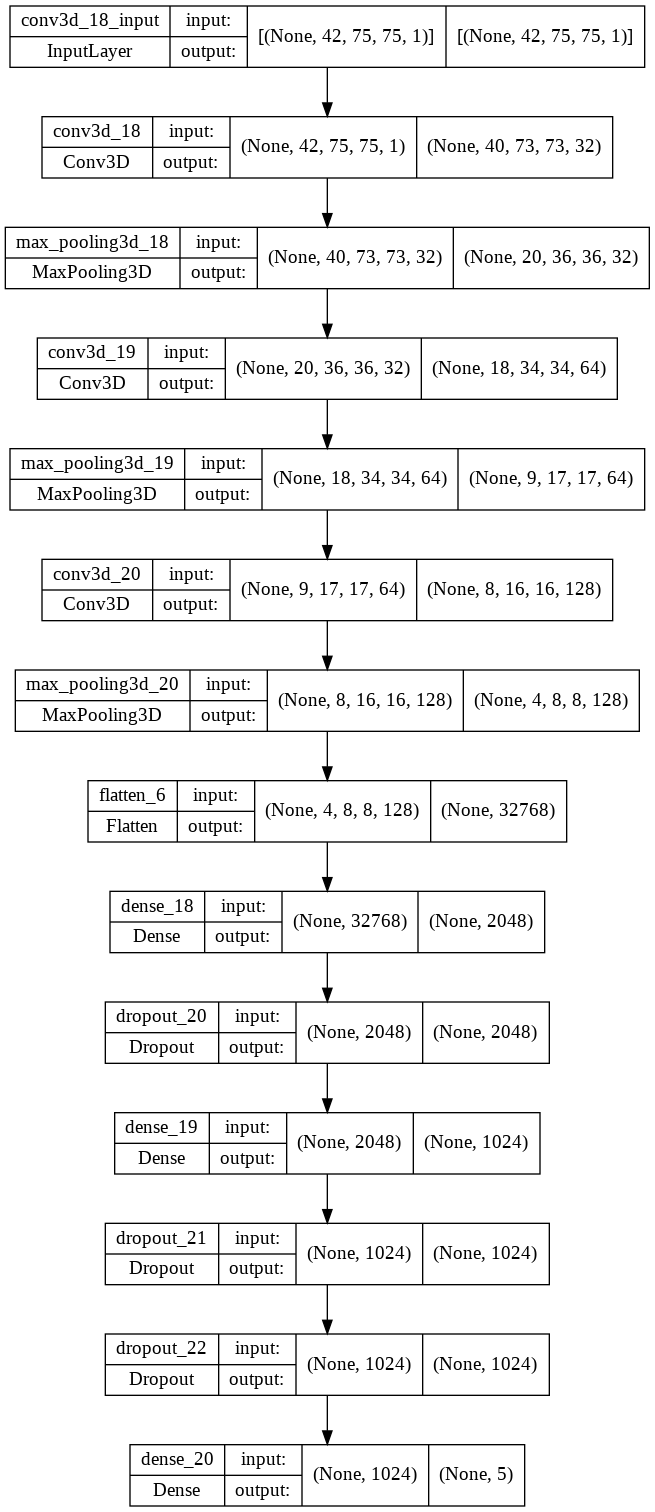

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

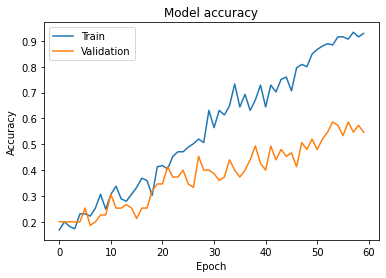

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

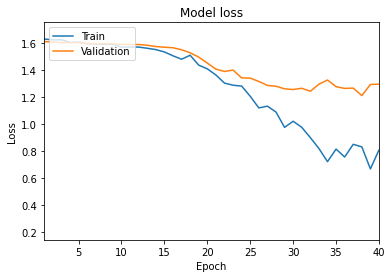

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(1, 40)
# plt.ylim(0, 3)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
ypred = model.predict(X_test)

In [ ]:
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)] 

In [ ]:
correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
    print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy}")

Predicted : Bari 	 Actual : Bari
Predicted : Bari 	 Actual : Bari
Predicted : Bari 	 Actual : Bari
Predicted : Guruthu 	 Actual : Hogu
Predicted : Hogu 	 Actual : Guruthu
Predicted : Bari 	 Actual : Bagge
Predicted : Bagge 	 Actual : Bagge
Predicted : Guruthu 	 Actual : Hogu
Predicted : Guruthu 	 Actual : Hogu
Predicted : Bari 	 Actual : Bari
Predicted : Guruthu 	 Actual : Guruthu
Predicted : Hogu 	 Actual : Hogu
Predicted : Bagge 	 Actual : Bagge
Predicted : Avanu 	 Actual : Avanu
Predicted : Guruthu 	 Actual : Guruthu
Predicted : Bari 	 Actual : Avanu
Predicted : Avanu 	 Actual : Bari
Predicted : Hogu 	 Actual : Hogu
Predicted : Avanu 	 Actual : Avanu
Predicted : Bari 	 Actual : Bagge
Predicted : Bagge 	 Actual : Bagge
Predicted : Avanu 	 Actual : Avanu
Predicted : Guruthu 	 Actual : Guruthu
Predicted : Hogu 	 Actual : Hogu
Predicted : Avanu 	 Actual : Avanu
Predicted : Hogu 	 Actual : Guruthu
Predicted : Bari 	 Actual : Bari
Predicted : Hogu 	 Actual : Avanu
Predicted : Bari 	 Actua

In [ ]:
from sklearn import metrics
import seaborn as sn

In [ ]:
print(metrics.classification_report(actual_words, predicted_words,labels=['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu']))

              precision    recall  f1-score   support

       Avanu       0.78      0.47      0.58        15
       Bagge       0.71      0.67      0.69        15
        Bari       0.48      0.73      0.58        15
     Guruthu       0.50      0.53      0.52        15
        Hogu       0.54      0.47      0.50        15

    accuracy                           0.57        75
   macro avg       0.60      0.57      0.57        75
weighted avg       0.60      0.57      0.57        75



In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

3/3 [==============================] - 0s 68ms/step - loss: 1.4068 - accuracy: 0.5467
Validation: accuracy = 0.546667  ;  loss_v = 1.406829
Test: accuracy = 0.573333  ;  loss = 1.541995


In [ ]:
from keras.models import save_model, load_model

# Creates a HDF5 file 'my_model.h5' 
save_model(model, '/content/drive/MyDrive/KAN_CNN_3D_2.h5') # model, [path + "/"] name of model

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# new_model = load_model('/content/drive/MyDrive/CNN_3D.h5')


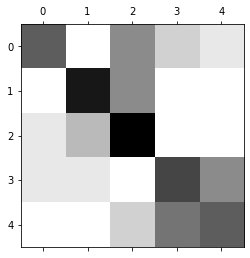

In [ ]:
cm= metrics.confusion_matrix(actual_words,predicted_words,labels=['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'])
plt.matshow(cm,cmap='binary')

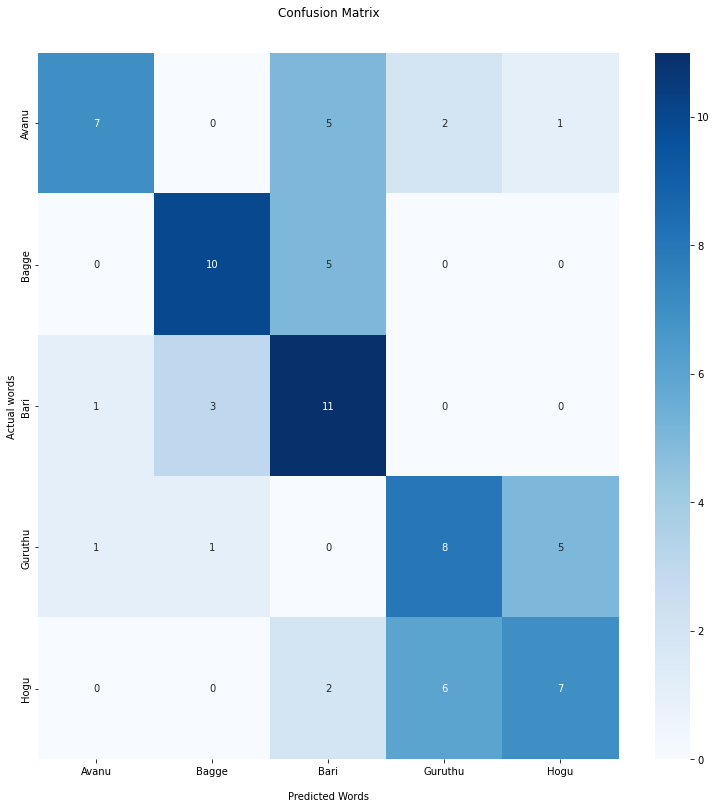

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Words')
ax.set_ylabel('Actual words');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'] )
ax.yaxis.set_ticklabels(['Avanu', 'Bagge', 'Bari', 'Guruthu', 'Hogu'] )

## Display the visualization of the Confusion Matrix.
# plt.figure(figsize=(10,9))
plt.show()